# Imports

In [305]:
from tqdm import tqdm
import KSAT_properties
import importlib
import numpy as np
importlib.reload(KSAT_properties)
import SimAnn
import KSAT
importlib.reload(SimAnn)
importlib.reload(KSAT)
import matplotlib.pyplot as plt

# Acceptance Rate

## M = 200

In [299]:
ksat = KSAT.KSAT(200, 200, 3, seed=45)

best, acc_rate = SimAnn.simann(ksat,
                     mcmc_steps = 200, anneal_steps =20,
                     beta0 = 1, beta1 = 10,
                     seed = 41,
                     debug_delta_cost = False)

Text(0, 0.5, 'Acc. Rate')

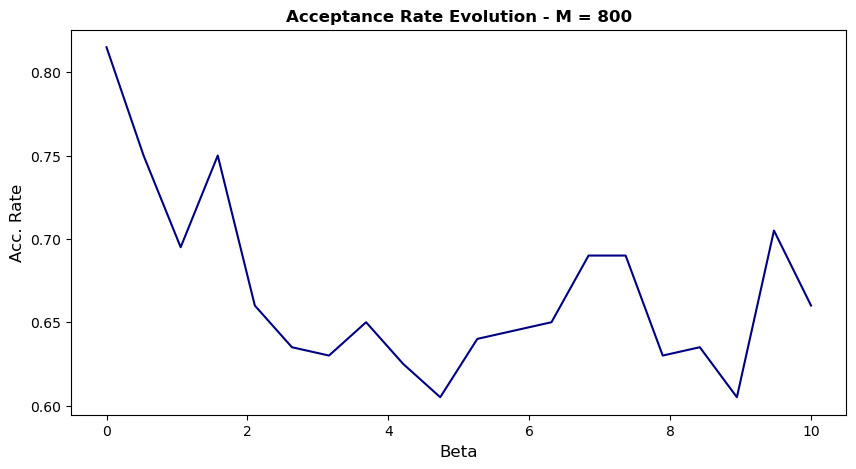

In [300]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(np.linspace(0, 10, 20), acc_rate, color = 'navy')
ax.set_title('Acceptance Rate Evolution - M = 800', fontsize=12, fontweight="bold")
ax.set_xlabel('Beta', fontsize=12)
ax.set_ylabel('Acc. Rate', fontsize=12)

## M = 800

In [301]:
ksat = KSAT.KSAT(200, 800, 3, seed=45)

best, acc_rate = SimAnn.simann(ksat,
                     mcmc_steps = 200, anneal_steps =20,
                     beta0 = 1, beta1 = 10,
                     seed = 41,
                     debug_delta_cost = False)

Text(0, 0.5, 'Acc. Rate')

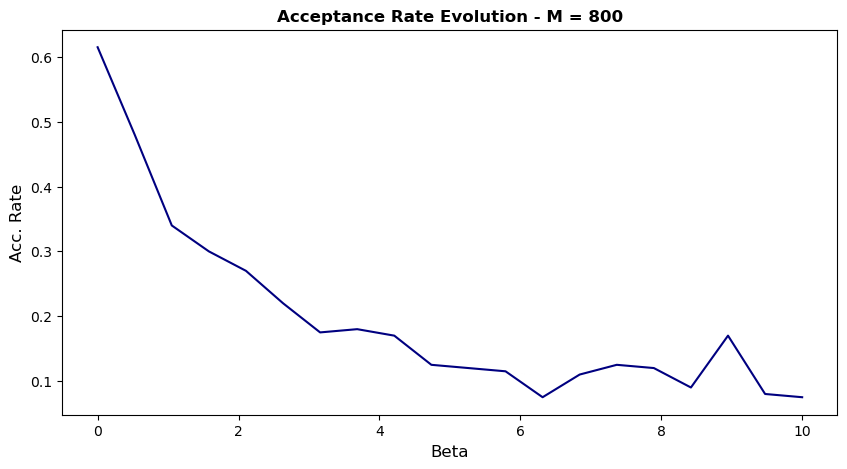

In [302]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(np.linspace(0, 10, 20), acc_rate, color = 'navy')
ax.set_title('Acceptance Rate Evolution - M = 800', fontsize=12, fontweight="bold")
ax.set_xlabel('Beta', fontsize=12)
ax.set_ylabel('Acc. Rate', fontsize=12)

# Percentage Solved for different values of M and N = 200

In [308]:
M = [200, 300, 400, 500, 600, 700, 800, 900, 1000]
percentage_solved = {}
for m in tqdm(M):
    percentage_solved[m] = KSAT_properties.empirical_probability(m)

100%|██████████| 9/9 [01:12<00:00,  8.06s/it]


Text(0, 0.5, 'Percentage (%)')

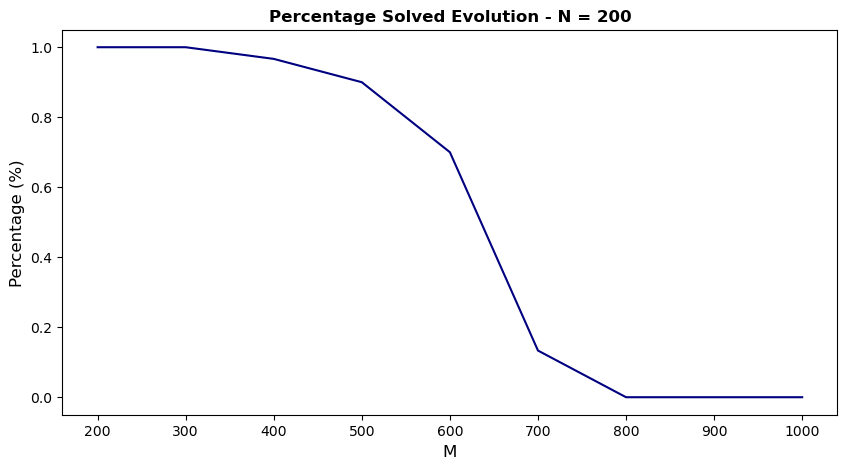

In [310]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(percentage_solved.keys(), percentage_solved.values(), color = 'navy')
ax.set_title('Percentage Solved Evolution - N = 200', fontsize=12, fontweight="bold")
ax.set_xlabel('M', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)

In [242]:
percentage_solved

{200: 1.0, 300: 1.0, 400: 1.0, 500: 0.8, 600: 0.43333333333333335}

# Algorithmic Threshold Analysis

In [243]:
N = [200,300,400,500,600]
M_alg = {}

In [245]:
for n in tqdm(N):
    mid_M = KSAT_properties.find_threshold(n, target_prob=0.5, min_M=100, max_M=2000)
    M_alg[n] = mid_M

  0%|          | 0/5 [00:00<?, ?it/s]

0.0 1050
0.6333333333333333 575
0.0 812
0.13333333333333333 693
0.4 634


 20%|██        | 1/5 [00:59<03:56, 59.13s/it]

0.5333333333333333 604
0.0 1050
1.0 575
0.43333333333333335 812
0.6666666666666666 693


 40%|████      | 2/5 [02:08<03:15, 65.17s/it]

0.5333333333333333 752
0.23333333333333334 1050
1.0 575
0.9333333333333333 812
0.6 931
0.23333333333333334 990
0.3333333333333333 960
0.6333333333333333 945
0.4 952


 60%|██████    | 3/5 [06:50<05:28, 164.05s/it]

0.4666666666666667 948


 80%|████████  | 4/5 [07:18<01:50, 110.41s/it]

0.4666666666666667 1050


100%|██████████| 5/5 [07:50<00:00, 94.19s/it] 

0.5333333333333333 1050


In [246]:
M_alg

{200: 604, 300: 752, 400: 948, 500: 1050, 600: 1050}

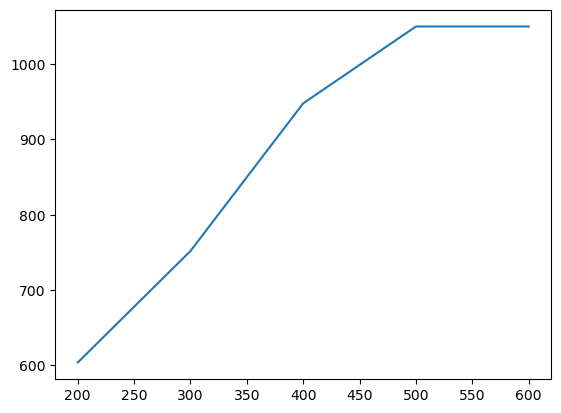

In [290]:
plt.plot(M_alg.keys(), M_alg.values())

In [270]:
import math
1 - math.log()

977.0

# Curve collapsing

100%|██████████| 7/7 [01:16<00:00, 10.93s/it]


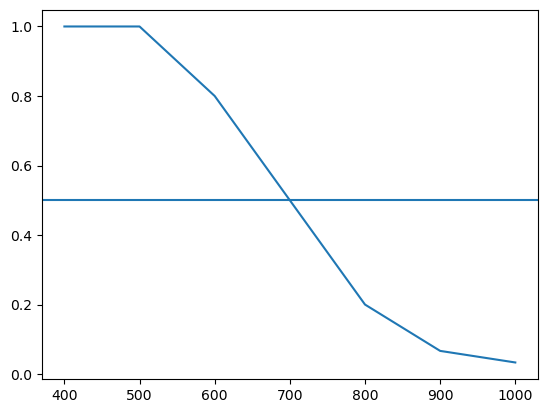

In [229]:
M = [400, 500, 600, 700, 800, 900, 1000]
percentage_solved = {}
for m in tqdm(M):
    percentage_solved[m] = KSAT_properties.empirical_probability(m, N = 300)
plt.plot(percentage_solved.keys(), percentage_solved.values())
plt.axhline(y = 0.5)

100%|██████████| 7/7 [01:39<00:00, 14.23s/it]


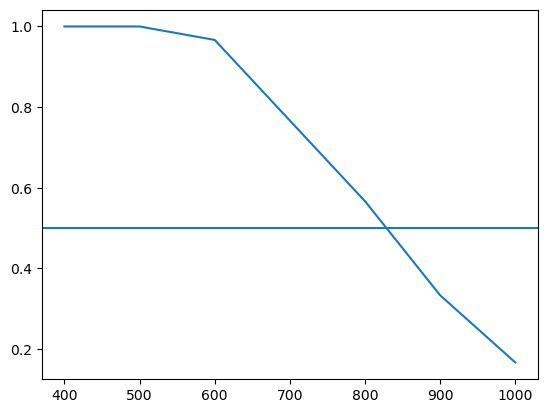

In [230]:
percentage_solved = {}
for m in tqdm(M):
    percentage_solved[m] = KSAT_properties.empirical_probability(m, N = 400)
plt.plot(percentage_solved.keys(), percentage_solved.values())
plt.axhline(y = 0.5)

100%|██████████| 7/7 [02:05<00:00, 17.89s/it]


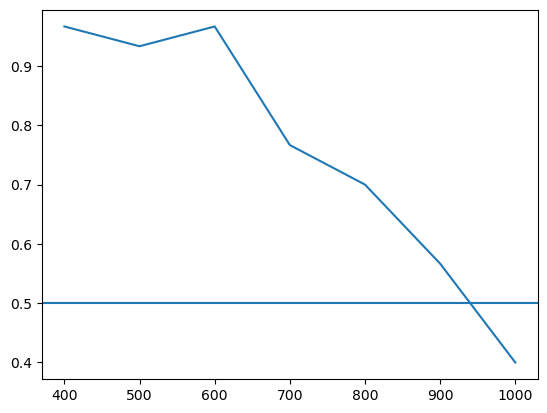

In [231]:
percentage_solved = {}
for m in tqdm(M):
    percentage_solved[m] = KSAT_properties.empirical_probability(m, N = 500)
plt.plot(percentage_solved.keys(), percentage_solved.values())
plt.axhline(y = 0.5)

In [232]:
percentage_solved = {}
for m in tqdm(M):
    percentage_solved[m] = KSAT_properties.empirical_probability(m, N = 600)
plt.plot(percentage_solved.keys(), percentage_solved.values())
plt.axhline(y = 0.5)

 43%|████▎     | 3/7 [00:49<01:06, 16.52s/it]


KeyboardInterrupt: 

In [234]:
M_alg

{200: 606, 300: 775, 400: 775, 500: 909, 600: 911}

In [248]:
N = np.array([200,300,400,500,600])
M = np.array(list(M_alg.values()))
alpha_values =  M/ N

In [249]:
alpha_values

array([3.02      , 2.50666667, 2.37      , 2.1       , 1.75      ])

In [272]:
probabilities = {}
M = 700
for n in tqdm(N):
    probabilities[n] = KSAT_properties.empirical_probability(M = M, N = n)

100%|██████████| 5/5 [01:22<00:00, 16.60s/it]


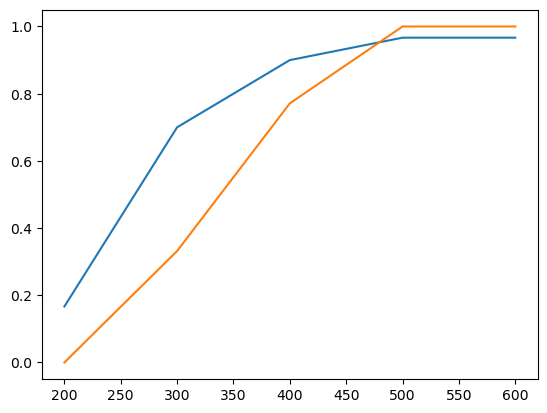

In [296]:
plt.plot(probabilities.keys(), probabilities.values())
plt.plot(probabilities.keys(), (M_A - M_A.min())/(M_A.max() - M_A.min()))

In [294]:
M_A = np.array(list(M_alg.values()))

In [276]:
np.array(list(M_alg.values()))

array([ 604,  752,  948, 1050, 1050])

In [150]:
probabilities = {}
n = 200
for alpha in alpha_values:
    probabilities[alpha] = KSAT_properties.empirical_probability(M = int(round(alpha*n)), N = n)

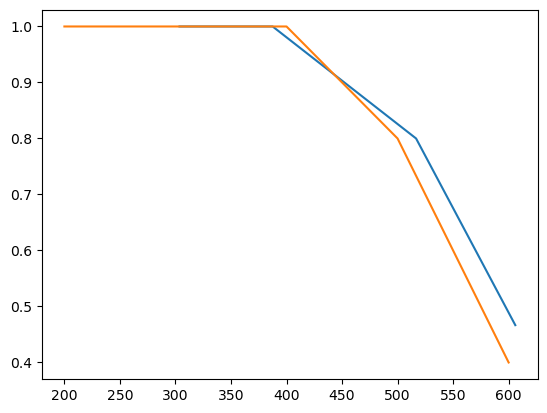

In [157]:
plt.plot(np.array(list(probabilities.keys())) * n, probabilities.values())
plt.plot(percentage_solved.keys(), percentage_solved.values())

In [165]:
probabilities.keys()

dict_keys([3.03, 2.5833333333333335, 1.9375, 1.818, 1.5183333333333333])

In [166]:
np.array(list(probabilities.keys())) * 200

array([606.        , 516.66666667, 387.5       , 363.6       ,
       303.66666667])

In [ ]:
m = 300